- probabilistic ML model used for classification that is based on BAYES THEOREM
- all the features are considered to be mutually exclusive of each other(independently dependent)
- all the features are contributing equally to the target variable
- we cannot build tree using naive bayes
- Types:
    - Gaussian model: used when the data is normally distributed
    - multinomial model: used in text classification with the help of Bernoulli trials
    - bernoulli model: used when the feature vectors are binary and used for two discrete variables
      extension of multinomial model
- easy and fast 
- performs well in multi-class
- works well when we have hundreds of data points but few variables
- handles discrete and continuous data

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [100]:
df = pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\iphone_purchase_records.csv')

In [101]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [102]:
df.shape

(400, 4)

In [103]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


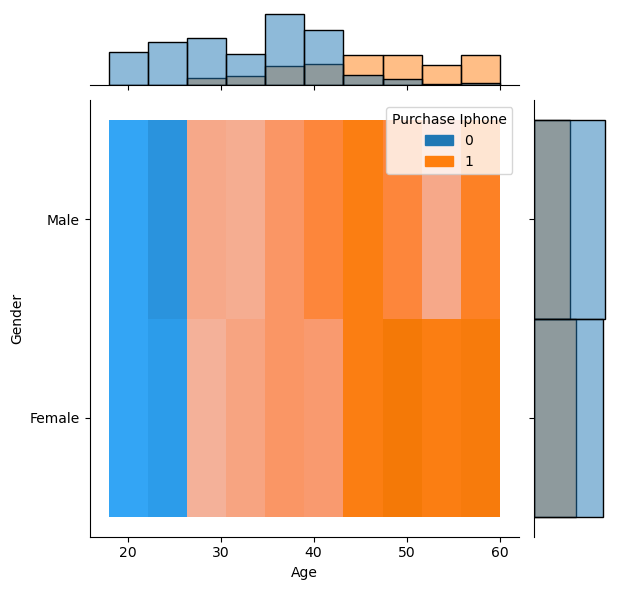

In [105]:
sns.jointplot(x='Age',y='Gender',data=df,hue='Purchase Iphone',kind='hist')

In [106]:
X = df[['Age','Salary']].values
y = df.iloc[:,3:].values

In [107]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [108]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [109]:
df.replace(['Male','Female'],[0,1],inplace = True)

In [110]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [111]:
gender_column = df['Gender'].values.reshape(-1, 1)
X=np.concatenate((X, gender_column), axis=1)

In [112]:
X

array([[-1.78179743, -1.49004624,  0.        ],
       [-0.25358736, -1.46068138,  0.        ],
       [-1.11320552, -0.78528968,  1.        ],
       ...,
       [ 1.17910958, -1.46068138,  1.        ],
       [-0.15807423, -1.07893824,  0.        ],
       [ 1.08359645, -0.99084367,  1.        ]])

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=0)

In [114]:
X_test

array([[-0.73115301,  0.50676401,  0.        ],
       [ 0.03295203, -0.57973568,  1.        ],
       [-0.25358736,  0.15438573,  0.        ],
       [-0.73115301,  0.27184516,  1.        ],
       [-0.25358736, -0.57973568,  1.        ],
       [-1.01769239, -1.46068138,  0.        ],
       [-0.63563988, -1.60750566,  1.        ],
       [-0.15807423,  2.18056084,  0.        ],
       [-1.87731056, -0.05116826,  1.        ],
       [ 0.89257019, -0.78528968,  0.        ],
       [-0.73115301, -0.60910054,  0.        ],
       [-0.92217926, -0.4329114 ,  1.        ],
       [-0.0625611 , -0.4329114 ,  0.        ],
       [ 0.12846516,  0.21311545,  0.        ],
       [-1.6862843 ,  0.47739916,  0.        ],
       [-0.54012675,  1.38770971,  1.        ],
       [-0.0625611 ,  0.21311545,  0.        ],
       [-1.78179743,  0.4480343 ,  0.        ],
       [ 1.65667523,  1.76945285,  1.        ],
       [-0.25358736, -1.40195167,  0.        ],
       [-0.25358736, -0.66783025,  1.   

In [116]:
X_train

array([[ 1.94321462,  2.18056084,  0.        ],
       [ 2.03872775,  0.38930459,  1.        ],
       [-1.30423178, -0.4329114 ,  1.        ],
       [-1.11320552, -1.02020853,  1.        ],
       [ 1.94321462, -0.93211396,  1.        ],
       [ 0.41500455,  0.30121002,  1.        ],
       [ 0.22397829,  0.15438573,  1.        ],
       [ 2.03872775,  1.76945285,  0.        ],
       [ 0.79705706, -0.84401939,  1.        ],
       [ 0.31949142, -0.28608712,  1.        ],
       [ 0.41500455, -0.16862769,  0.        ],
       [-0.0625611 ,  2.23929055,  1.        ],
       [-1.39974491, -0.63846539,  1.        ],
       [-1.20871865, -1.07893824,  0.        ],
       [-1.30423178,  0.41866944,  0.        ],
       [-1.01769239,  0.77104772,  1.        ],
       [-1.39974491, -0.19799255,  0.        ],
       [ 0.98808332, -1.07893824,  0.        ],
       [ 0.98808332,  0.59485858,  0.        ],
       [ 0.41500455,  1.00596657,  0.        ],
       [ 0.60603081, -0.9027491 ,  1.   

In [118]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [119]:
y_pred = gnb.predict(X_test)

In [121]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[56  2]
 [ 4 18]]


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [124]:
# AUC Score
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc)

AUC Score: 0.8918495297805644


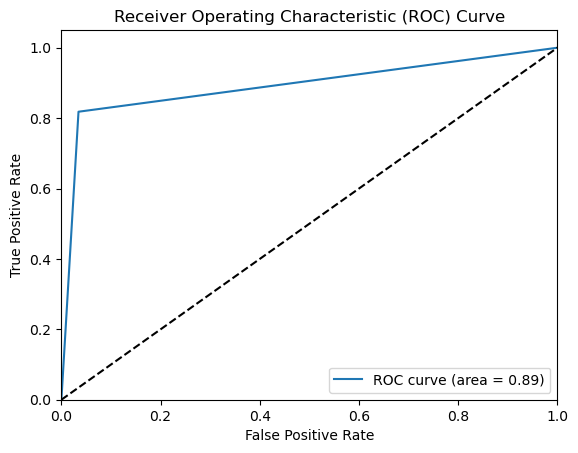

In [125]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()